# Customer Churn using ANN

Importing the libraries



In [4]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import BatchNormalization
from sklearn.metrics import confusion_matrix,accuracy_score

Importing the dataset

In [5]:
df = pd.read_csv('/content/drive/MyDrive/CA2 Project/Churn_Modelling.csv')

In [6]:
df.head(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Handling Missing Values

In [8]:
print(df.isnull().sum())

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64


Encoding

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [10]:
gender = df["Gender"].value_counts()
gender

,count
Gender,
Male,5457
Female,4543


In [11]:
geography = df["Geography"].value_counts()
geography

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [12]:
le = LabelEncoder()  # Initialize the encoder

In [13]:
# Apply label encoding
df['Gender'] = le.fit_transform(df['Gender'])        # Female = 0, Male = 1 (or vice versa)
df['Geography'] = le.fit_transform(df['Geography'])    # France = 0, Germany = 1, Spain = 2 (order may vary)

In [14]:
df.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


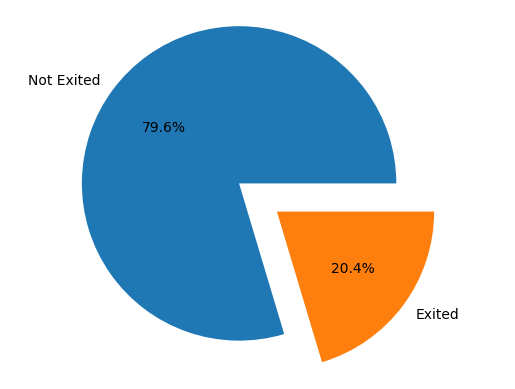

In [15]:
exited = df["Exited"].value_counts()
plt.pie(exited, labels=["Not Exited","Exited"],explode=(0,0.3),autopct='%1.1f%%')
plt.axis('equal')
plt.show()

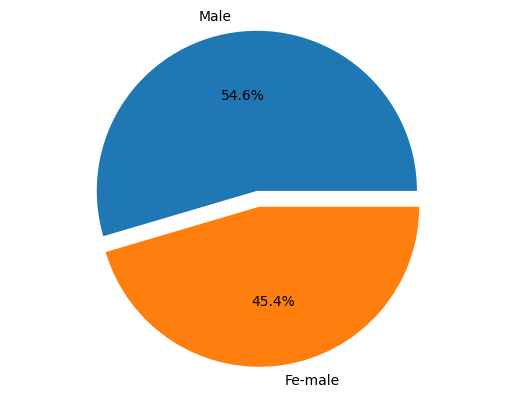

In [16]:
gender = df["Gender"].value_counts()
plt.pie(gender,labels=["Male","Fe-male"],explode=(0,0.1),autopct='%1.1f%%')
plt.axis('equal')
plt.show()

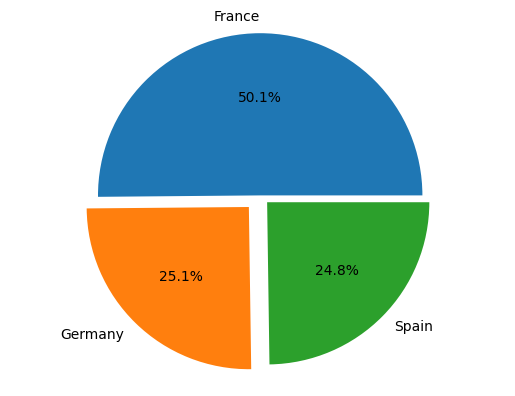

In [17]:
geography = df["Geography"].value_counts()
plt.pie(geography,labels=["France","Germany","Spain"],explode=(0,0.1,0.06),autopct='%1.1f%%')
plt.axis('equal')
plt.show()

,Exited
CreditScore,-0.027094
Geography,0.035943
Gender,-0.106512
Age,0.285323
Tenure,-0.014001
Balance,0.118533
NumOfProducts,-0.047820
HasCrCard,-0.007138
IsActiveMember,-0.156128
EstimatedSalary,0.012097


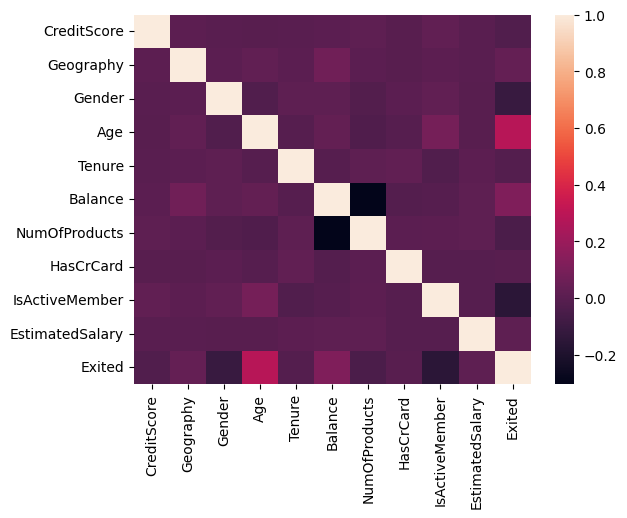

In [18]:
corr = df.corr()
sns.heatmap(corr)

corr["Exited"]

Train Test Split

In [19]:
X = df.drop("Exited", axis=1)
y = df["Exited"]

In [20]:
X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.00,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [21]:
y

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [25]:
X.shape

(10000, 10)

In [22]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 17)

In [23]:
X_train.shape

(7000, 10)

In [27]:
X_test.shape

(3000, 10)

In [29]:
# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [30]:
X_train

array([[-1.17005485, -0.90087759,  0.919778  , ..., -1.54803408,
        -1.02020406,  0.06068729],
       [-0.38733762, -0.90087759,  0.919778  , ...,  0.64598061,
        -1.02020406, -0.68992042],
       [-0.68600604, -0.90087759,  0.919778  , ...,  0.64598061,
         0.98019606,  0.09981385],
       ...,
       [-1.46872326, -0.90087759, -1.08721888, ...,  0.64598061,
         0.98019606, -0.10226006],
       [-1.15975594,  1.51665859, -1.08721888, ..., -1.54803408,
        -1.02020406,  1.27885589],
       [-1.29364178,  1.51665859, -1.08721888, ...,  0.64598061,
        -1.02020406, -0.30434369]])

Modelling

In [35]:
model = Sequential()

#adding the first input layer and the first hidden layer
model.add(Dense(10, kernel_initializer = 'normal', activation = 'relu', input_shape = (10,)))

#adding batch normalization and dropout layer
model.add(Dropout(rate = 0.1))
model.add(BatchNormalization())

#adding second hidden layer
model.add(Dense(7, kernel_initializer = 'normal', activation = 'relu'))

#adding batch normalization and dropout layer
model.add(Dropout(rate = 0.1))
model.add(BatchNormalization())

#adding outputlayer
model.add(Dense(1, kernel_initializer = 'normal', activation = 'sigmoid'))

In [36]:
# Compile the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [37]:
# Train the model
history = model.fit(X_train, y_train, validation_split=0.33, batch_size = 10, epochs = 100)

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.6978 - loss: 0.6308 - val_accuracy: 0.8126 - val_loss: 0.4597
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8030 - loss: 0.4546 - val_accuracy: 0.8295 - val_loss: 0.4071
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8190 - loss: 0.4244 - val_accuracy: 0.8343 - val_loss: 0.3925
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8213 - loss: 0.4104 - val_accuracy: 0.8460 - val_loss: 0.3780
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8329 - loss: 0.4003 - val_accuracy: 0.8451 - val_loss: 0.3727
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8297 - loss: 0.4052 - val_accuracy: 0.8568 - val_loss: 0.3596
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8183 - loss: 0.4145 - val_accuracy: 0.8451 - val_loss: 0.3690
Epoch 8/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8381 - loss: 0.3906 - val_accu

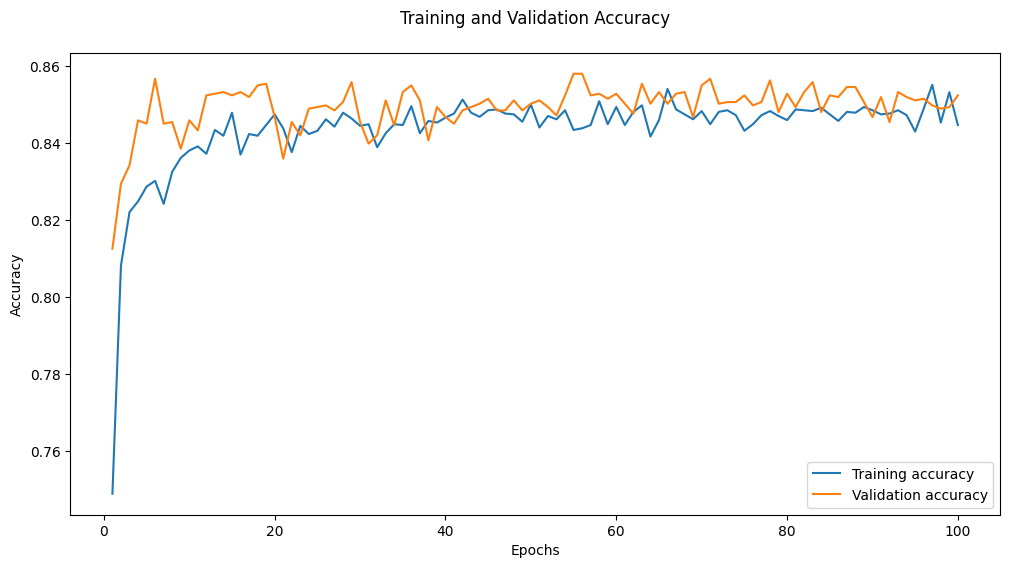

In [38]:
plt.figure(figsize = (12, 6))

train_loss = history.history['accuracy']
val_loss = history.history['val_accuracy']
epoch = range(1, 101)
sns.lineplot(x = epoch, y = train_loss, label = 'Training accuracy')
sns.lineplot(x = epoch, y = val_loss, label = 'Validation accuracy')
plt.title('Training and Validation Accuracy\n')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [39]:
acc = model.evaluate(X_test, y_test)[1]

print(f'Accuracy of model is {acc}')

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8466 - loss: 0.3671
Accuracy of model is 0.8519999980926514


In [40]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [41]:
y_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [42]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[2344,   43],
       [ 401,  212]])

In [43]:
model.save("ANN_model.keras")

In [44]:
import pickle

with open('scaler.pkl', 'wb') as f:
    pickle.dump(sc, f)